# AUEB M.Sc. in Data Science (part-time)

### 2024.04 - 2024.06

## PROJECT 03: Develop a sentiment classifier for a kind of texts of your choice


**Course**: Text Analytics   
**Authors**:
Anagnos Theodoros (p3352323) -
Michalopoulos Ioannis (p3352314) -
Kafantaris Panagiotis (p3352328) -  
Vigkos Ioannis (p3352326)

**Date**: 2024-04-29

# Assignment 09

In [ ]:
import pandas as pd
import numpy as np
import zipfile

df = pd.read_excel('LabeledText.xlsx')

In [ ]:
# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
#keep only the columns we need
df=df[['Caption','LABEL']]

In [ ]:
# Print unique categories/labels in the dataset
print('Categories')
print(df.LABEL.unique())
print("-------------")

# Print a sample of the dataset
print('Dataset Sample')
df.head()

Categories
['negative' 'positive' 'neutral']
-------------
Dataset Sample


,Caption,LABEL
0,How I feel today #legday #jelly #aching #gym,negative
1,@ArrivaTW absolute disgrace two carriages from Bangor half way there standing room only #disgraced,negative
2,This is my Valentine's from 1 of my nephews. I am elated; sometimes the little things are the biggest & best things!,positive
3,betterfeelingfilms: RT via Instagram: First day of filming #powerless back in 2011. Can't ¡­,neutral
4,Zoe's first love #Rattled @JohnnyHarper15,positive


## Data Cleansing

This section focuses on preparing the text data for analysis by performing various preprocessing steps. It includes tasks such as removing URLs, HTML tags, punctuation, numbers, and stop words, as well as expanding contractions and lemmatizing words. Additionally, it ensures consistency and standardization in the text data, which is essential for accurate and reliable natural language processing tasks, such as sentiment analysis.


In [ ]:
# Lowercase the data
df['text_cleaned'] = df['Caption'].apply(lambda x: x.lower())

In [ ]:
!pip install lxml

import re
from bs4 import BeautifulSoup

# Removing URLs from the text
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))

# Removing HTML tags from the text
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: BeautifulSoup(x, "html.parser").text)

<ipython-input-6-8b9b66f9a82c>:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['text_cleaned'] = df['text_cleaned'].apply(lambda x: BeautifulSoup(x, "html.parser").text)


In [ ]:
# Dictionary to convert common chat words to their full forms
#There are many more chat words that can be added to this dictionary. These are some common examples.
chat_words_dict = {
    "imo": "in my opinion",
     "cyaa": "see you",
    "idk": "I don't know",
    "rn": "right now",
    "afaik": "as far as I know",

}

In [ ]:
# Function that returns the text with chat words converted to their full forms

def convert_chat_words(text):
    words = text.split()
    converted_words = []
    for word in words:
        if word.lower() in chat_words_dict:
            converted_words.append(chat_words_dict[word.lower()])
        else:
            converted_words.append(word)
    converted_text = " ".join(converted_words)
    return converted_text

In [ ]:
df['text_cleaned'] = df['text_cleaned'].apply(convert_chat_words)

In [ ]:
# Removing punctuation
import string
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Removing numbers
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'\d+', '', x))

# Removing extra spaces
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: ' '.join(x.split()))

# Replacing repetitions of punctuation
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'(\W)\1+', r'\1', x))

In [ ]:
# Removing special characters
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r"[^\w\s]", '', x))

In [ ]:
!pip install contractions

# Removing contractions
import contractions
# Remove contractions from the 'text_cleaned' column
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: contractions.fix(x))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
!pip install nltk

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
# Tokenization
df['tokens'] = df['text_cleaned'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Removing stop words

nltk.download('stopwords')

from nltk.corpus import stopwords

# Loading English stop words
stop_words = set(stopwords.words('english'))

# Removing stop words from the 'tokens' column
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Print the updated 'tokens' column
df['tokens'].tail(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


4849              [get, friday, night, look, sorted, newin, lbd, littleblackdress, strappy, plunge, neckline, mini, black, bodycon]
4850                                                                                         [rt, nneagoe, love, caring, beautiful]
4851               [february, winter, rainy, stormy, windy, wednesday, morning, love, happy, positive, passionate, reading, coffee]
4852    [rt, thatguykai, honored, pittsburgh, pirates, consultant, coachotip, speak, ball, club, passionate, relentless, ownership]
4853                                              [genghis, khan, ily, relatable, king, passionate, yeet, yas, sogengrn, apgenghis]
4854                 [february, winter, rainy, stormy, windy, wednesday, evening, love, happy, positive, passionate, calm, fun, uk]
4855                  [february, winter, rainy, stormy, windy, wednesday, evening, love, happy, positive, passionate, calm, coffee]
4856                                                   [rt, bishopcarrollhs,

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# POS tag mapping dictionary
wordnet_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

# Function to perform Lemmatization on a text
def lemmatize_text(text):
    # Get the POS tags for the words
    pos_tags = nltk.pos_tag(text)

    # Perform Lemmatization
    lemmatized_words = []
    for word, tag in pos_tags:
        # Map the POS tag to WordNet POS tag
        pos = wordnet_map.get(tag[0].upper(), wordnet.NOUN)
        # Lemmatize the word with the appropriate POS tag
        lemmatized_word = lemmatizer.lemmatize(word, pos=pos)
        # Add the lemmatized word to the list
        lemmatized_words.append(lemmatized_word)

    return lemmatized_words

# Apply Lemmatization to the 'tokens' column
df['tokens'] = df['tokens'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df.head()

,Caption,LABEL,text_cleaned,tokens
0,How I feel today #legday #jelly #aching #gym,negative,how i feel today legday jelly aching gym,"[feel, today, legday, jelly, ache, gym]"
1,@ArrivaTW absolute disgrace two carriages from Bangor half way there standing room only #disgraced,negative,arrivatw absolute disgrace two carriages from bangor half way there standing room only disgraced,"[arrivatw, absolute, disgrace, two, carriage, bangor, half, way, stand, room, disgrace]"
2,This is my Valentine's from 1 of my nephews. I am elated; sometimes the little things are the biggest & best things!,positive,this is my valentines from of my nephews i am elated sometimes the little things are the biggest best things,"[valentine, nephew, elate, sometimes, little, thing, big, best, thing]"
3,betterfeelingfilms: RT via Instagram: First day of filming #powerless back in 2011. Can't ¡­,neutral,betterfeelingfilms rt via instagram first day of filming powerless back in cannot,"[betterfeelingfilms, rt, via, instagram, first, day, film, powerless, back]"
4,Zoe's first love #Rattled @JohnnyHarper15,positive,zoes first love rattled johnnyharper,"[zoes, first, love, rattle, johnnyharper]"


## Train-Test split of dataset

In [ ]:
# Splitting the data into training and validation sets

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df.tokens,
                                                  df.LABEL,
                                                  test_size=0.3,
                                                  random_state=12547392)

In [ ]:
print(X_train.head())
print(y_train.head())

1807             [rt, dallasblackcom, horrible, news, los, angeles, today, regard, khloes, estrange, husband, lamar, odom]
1619                                                                                          [feel, desolate, take, quiz]
526     [rt, bosshogswife, duckcommanderkidsdevo, release, today, book, much, fun, read, kiddos, chryssymama, excite, htt]
915                                                                          [indias, modi, appal, temple, build, worship]
3485                                                      [photo, photographer, get, rumble, jungle, beat, stone, gorilla]
Name: tokens, dtype: object
1807    negative
1619    negative
526     positive
915     negative
3485     neutral
Name: LABEL, dtype: object


In [ ]:
# Printing the lengths of the training and validation sets

print(len(X_train)) # Number of samples in the training set
print(len(y_train))  # Number of labels in the training set
print(len(X_val))  # Number of samples in the validation set
print(len(y_val))  # Number of labels in the validation set

3408
3408
1461
1461


## Create TF-IDF features and apply SVD

TF-IDF (Term Frequency-Inverse Document Frequency)
TF-IDF measures word importance in a document compared to its frequency in a collection of documents. Higher scores indicate more relevance.

SVD (Singular Value Decomposition)
SVD reduces data dimensions while preserving important information. It's often used with TF-IDF matrices in text analysis to improve efficiency.


In [ ]:
# Resetting the index of X_train and X_val
# To ensure that they start from 0 and are consecutive after any previous operations that might have altered the index

X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)

In [ ]:
# Resetting the index of y_train and y_val
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

In [ ]:
X_train.head()

0             [rt, dallasblackcom, horrible, news, los, angeles, today, regard, khloes, estrange, husband, lamar, odom]
1                                                                                          [feel, desolate, take, quiz]
2    [rt, bosshogswife, duckcommanderkidsdevo, release, today, book, much, fun, read, kiddos, chryssymama, excite, htt]
3                                                                         [indias, modi, appal, temple, build, worship]
4                                                      [photo, photographer, get, rumble, jungle, beat, stone, gorilla]
Name: tokens, dtype: object

In [ ]:
# Printing the first 5 items of y_train

for item in y_train[:5]:
    print(item)

negative
negative
positive
negative
neutral


In [ ]:
# Importing TfidfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Use unigram & bi-gram tf*idf features
# max_features=6000: Limiting the maximum number of features to 6000
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features = 6000,
                             sublinear_tf=True)

# Transforming the tokenized text data into TF-IDF features for training set
X_train_tfidf = vectorizer.fit_transform([" ".join(x) for x in
                                          X_train])

# Transforming the tokenized text data into TF-IDF features for validation set
X_val_tfidf = vectorizer.transform([" ".join(x) for x in
                                    X_val])
print(X_train_tfidf.shape, type(X_train_tfidf))

(3408, 6000) <class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
#Reducing the number of dimensions from 5000 to 500
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1000, random_state=4321)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_val_svd = svd.transform(X_val_tfidf)

## Logistic Regression with and without SVD

In [ ]:
# Logistic Regression with SVD

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(solver="liblinear")
clf.fit(X_train_svd, y_train)

predictions = clf.predict(X_val_svd)

In [ ]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

    negative       0.66      0.55      0.60       426
     neutral       0.59      0.67      0.63       552
    positive       0.74      0.74      0.74       483

    accuracy                           0.66      1461
   macro avg       0.67      0.65      0.66      1461
weighted avg       0.66      0.66      0.66      1461



In [ ]:
## Logistic Regression Without SVD

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(solver="liblinear")
clf.fit(X_train_tfidf, y_train)

predictions = clf.predict(X_val_tfidf)
# print(classification_report(y_val, predictions,
#                             target_names=df.LABEL))

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

    negative       0.68      0.62      0.65       426
     neutral       0.62      0.67      0.64       552
    positive       0.75      0.73      0.74       483

    accuracy                           0.68      1461
   macro avg       0.68      0.68      0.68      1461
weighted avg       0.68      0.68      0.68      1461



## MLP classifier in Keras

### 1-Hot Vectors

In [ ]:
y_train_1_hot = pd.get_dummies(y_train).values.tolist()


#1-Hot to train set
for i in range(len(y_train_1_hot)):
    for j in range(3):
        if y_train_1_hot[i][j]==True:
            y_train_1_hot[i][j]=1
        else:
            y_train_1_hot[i][j]=0



#1-Hot to validation set
y_val_1_hot = pd.get_dummies(y_val).values.tolist()

for i in range(len(y_val_1_hot)):
    for j in range(3):
        if y_val_1_hot[i][j]==True:
            y_val_1_hot[i][j]=1
        else:
            y_val_1_hot[i][j]=0




for i,name in enumerate (pd.get_dummies(y_train).columns):
    print("Index:",i," Category: ",name)

print("-----------------------------------")

print("Label index: {} | 1-hot vector:  {}".format(y_train[0],
                                                   y_train_1_hot[0]))
print("Label index: {} | 1-hot vector:  {}".format(y_train[2],
                                                   y_train_1_hot[2]))
print("Label index: {} | 1-hot vector:  {}".format(y_train.iloc[-3],
                                                   y_train_1_hot[-3]))

Index: 0  Category:  negative
Index: 1  Category:  neutral
Index: 2  Category:  positive
-----------------------------------
Label index: negative | 1-hot vector:  [1, 0, 0]
Label index: positive | 1-hot vector:  [0, 0, 1]
Label index: neutral | 1-hot vector:  [0, 1, 0]


In [ ]:
# Convert y_train_1_hot from list to numpy array
y_train_1_hot = np.array(y_train_1_hot)
y_val_1_hot = np.array(y_val_1_hot)

### Custom Keras callback for calculating f1, precision, recall at the end of each epoch

In [ ]:
import tensorflow as tf
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np
import os


class Metrics(tf.keras.callbacks.Callback):
    def __init__(self, valid_data):
        super(Metrics, self).__init__()
        self.validation_data = valid_data

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}

        # Get predictions on validation data
        val_predict = np.argmax(self.model.predict(self.validation_data[0]), -1)
        val_targ = self.validation_data[1]
        val_targ = tf.cast(val_targ,dtype=tf.float32)
        # If val_targ is 1-hot
        if len(val_targ.shape) == 2 and val_targ.shape[1] != 1:
          val_targ = np.argmax(val_targ, -1)

        _val_f1 = f1_score(val_targ, val_predict,average="weighted")
        _val_recall = recall_score(val_targ, val_predict,average="weighted")
        _val_precision = precision_score(val_targ, val_predict,average="weighted")

        logs['val_f1'] = _val_f1
        logs['val_recall'] = _val_recall
        logs['val_precision'] = _val_precision
        print(" — val_f1: %f — val_precision: %f — val_recall: %f" % (_val_f1, _val_precision, _val_recall))
        return

### MLP classifier in Keras using TF-IDF features

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy


model = Sequential()
model.add(Dense(512, input_dim=X_train_svd.shape[1] , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,  activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',   # Categorical crossentropy loss function for multi-class classification
                  optimizer=Adam(learning_rate=0.001),  # Adam optimizer with learning rate of 0.001
                  metrics=[CategoricalAccuracy()])

if not os.path.exists('./checkpoints'):
  os.makedirs('./checkpoints')

# Configure model checkpoint to save the best model based on validation F1 score
checkpoint = ModelCheckpoint('checkpoints/tfidf_mlp.weights.h5',
                                                monitor='val_f1',
                                                mode='max', verbose=2,
                                                save_best_only=True,
                                                save_weights_only=True)

history = model.fit(X_train_svd, y_train_1_hot,
              validation_data=(X_val_svd, y_val_1_hot),
              batch_size=256,  # Batch size
              epochs=100,  # Number of epochs
              shuffle=True,
              callbacks=[Metrics(valid_data=(X_val_svd, y_val_1_hot)),
              checkpoint])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               512512    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 644611 (2.46 MB)
Trainable params: 644611 (2.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
46/

### Plot model accuracy and loss

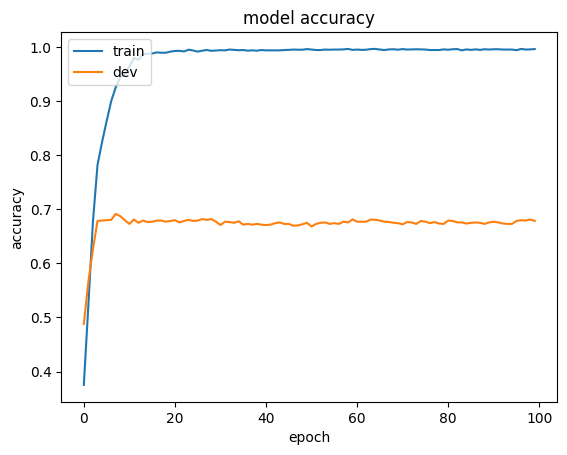

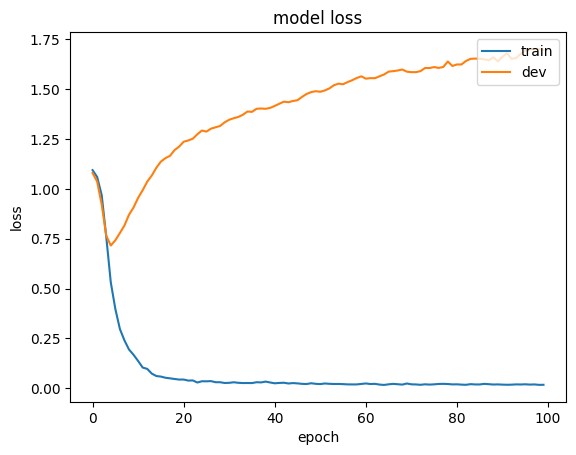

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


# Plot history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()
# Plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()

### Tune Hyperparameters

In [ ]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner
import keras

In [ ]:
def build_model(hp):
    model = Sequential()

    layer_index = 0
    for i in range(hp.Int(name='num_layers',min_value=1,max_value=3)):
        if layer_index == 0:
            model.add(Dense(hp.Int(name='hidden_units_'+str(i),min_value=128,max_value=512,step=64),
                            activation=hp.Choice(name='activation_layer'+str(i),values=['relu','tanh']),
                            input_dim=X_train_svd.shape[1]
                           ))
            model.add(Dropout(hp.Choice(name='dropout_layer_'+str(i),values=[0.1,0.2,0.3,0.4,0.5])))
        else:
            model.add(Dense(hp.Int(name='hidden_units_'+str(i),min_value=128,max_value=512,step=64),
                            activation=hp.Choice(name='activation_layer'+str(i),values=['relu','tanh'])))
            model.add(Dropout(hp.Choice(name='dropout_layer_'+str(i),values=[0.1,0.2,0.3,0.4,0.5])))

        layer_index += 1

    # Add last layer that produces the logits
    model.add(Dense(len(df.LABEL.unique()),  activation='softmax'))

    # Tune the learning rate for the optimizer by choosing an optimal value from 0.01, 0.001, or 0.0001

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2,1e-3,1e-4])
    model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=hp_learning_rate),
                  metrics=[CategoricalAccuracy()])

    return model

In [ ]:
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping

# Define the Keras Tuner RandomSearch object
tuner = kt.RandomSearch(build_model,
                        objective=kt.Objective("val_categorical_accuracy", direction="max"),
                        max_trials = 20,
                        directory='KT_dir',
                        project_name='KT_tuning')

# Define EarlyStopping callback to stop training if validation loss stops decreasing
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10)   # Number of epochs with no improvement before stopping

# Print a summary of the search space for tuning
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
hidden_units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 64, 'sampling': 'linear'}
activation_layer0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout_layer_0 (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2, 0.3, 0.4, 0.5], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(X_train_svd, y_train_1_hot,
             validation_data=(X_val_svd, y_val_1_hot), epochs=50, batch_size = 128,
             callbacks=[early_stopping])

Trial 20 Complete [00h 00m 12s]
val_categorical_accuracy: 0.6865161061286926

Best val_categorical_accuracy So Far: 0.6872005462646484
Total elapsed time: 00h 04m 05s


In [ ]:
# Trials summary
tuner.results_summary()

Results summary
Results in KT_dir/KT_tuning
Showing 10 best trials
Objective(name="val_categorical_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
num_layers: 3
hidden_units_0: 512
activation_layer0: relu
dropout_layer_0: 0.2
learning_rate: 0.001
hidden_units_1: 128
activation_layer1: relu
dropout_layer_1: 0.1
hidden_units_2: 128
activation_layer2: relu
dropout_layer_2: 0.1
Score: 0.6872005462646484

Trial 06 summary
Hyperparameters:
num_layers: 2
hidden_units_0: 256
activation_layer0: relu
dropout_layer_0: 0.2
learning_rate: 0.001
hidden_units_1: 256
activation_layer1: tanh
dropout_layer_1: 0.4
hidden_units_2: 384
activation_layer2: relu
dropout_layer_2: 0.3
Score: 0.6872005462646484

Trial 19 summary
Hyperparameters:
num_layers: 1
hidden_units_0: 512
activation_layer0: relu
dropout_layer_0: 0.5
learning_rate: 0.01
hidden_units_1: 512
activation_layer1: tanh
dropout_layer_1: 0.2
hidden_units_2: 448
activation_layer2: tanh
dropout_layer_2: 0.4
Score: 0.6865161061286926



In [ ]:
# Get best hyper-parameters setup
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'hidden_units_0': 512,
 'activation_layer0': 'relu',
 'dropout_layer_0': 0.2,
 'learning_rate': 0.001,
 'hidden_units_1': 128,
 'activation_layer1': 'relu',
 'dropout_layer_1': 0.1,
 'hidden_units_2': 128,
 'activation_layer2': 'relu',
 'dropout_layer_2': 0.1}

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               512512    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 3

In [ ]:
predictions = np.argmax(best_model.predict(X_val_svd), -1)
print(predictions)

46/46 [==============================] - 0s 5ms/step
[1 1 0 ... 0 1 1]


In [ ]:
# Create a dictionary to map class labels to class names
label_to_name = {i: name for i, name in enumerate(pd.get_dummies(y_val).columns)}

# Replace integer class labels in predictions with class names
predictions_with_names = [label_to_name[label] for label in predictions]

print(predictions_with_names)



['neutral', 'neutral', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'neutral', 'neutral', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'neutral', 'neutral', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'neutral', 'positive', 'negative', 'positive', 'neutral', 'negative', 'positive', 'negative', 'negative', 'neutral', 'negative', 'positive', 'positive', 'positive', 'neutral', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'neutral', 'neutral', 'neutral', 'negative', 'negative', 'nega

### Best MLP model

In [ ]:
# Print the best model performance after hyperparameters tuning

print(classification_report(y_val, predictions_with_names))

              precision    recall  f1-score   support

    negative       0.66      0.67      0.67       426
     neutral       0.64      0.67      0.66       552
    positive       0.76      0.72      0.74       483

    accuracy                           0.69      1461
   macro avg       0.69      0.69      0.69      1461
weighted avg       0.69      0.69      0.69      1461

